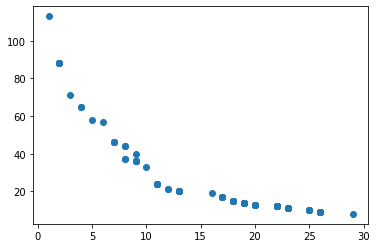

In [1]:
import sklearn #Machine learning library
import pandas as pd #For data manipulation and analysis
import numpy as np #For performing mathematical operations
from sklearn.linear_model  import LinearRegression #For implementing linear regression

#Read the Excel file from the system
df = pd.read_excel('C:\\Users\\HP\\OneDrive\\Desktop\\Olympics in Tokyo Dataset\\Medals.xlsx')
df = df.head(100)
df.shape
np.corrcoef(df['Total'],df["RankbyTotal"]) #returns a correlation matrix
#Correlation matrix is a measure of the extent to which two variables are related. 

#sample() is used to generate a sample random row or column
df_sampled = df.sample(frac=1).drop_duplicates(['RankbyTotal']) 
df_sampled
np.corrcoef(df_sampled['Total'],df_sampled["RankbyTotal"]) #returns a correlation matrix

#Implementing linear regression
model = LinearRegression()

#reshape() gives a new shape to an array without changing its data
model.fit(np.reshape(df_sampled['Total'].values,(-1,1)),np.reshape(df_sampled["RankbyTotal"].values,(-1,1)))
model.predict(np.array([[0]]))

#Plot the excel data
import matplotlib.pyplot as plt

#sets the backend of matplotlib
%matplotlib inline 

plt.plot(df["RankbyTotal"],df["Total"],"o")

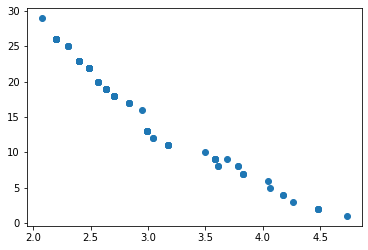

In [2]:
#Logarithmic transformation to make the data linear
plt.plot(np.log(df["Total"]),(df["RankbyTotal"]),"o")

In [11]:
from sklearn.svm import SVR #Used to model non-linear relationships for variables 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler #Removes the mean and scales each feature to unit variance
from sklearn.preprocessing import FunctionTransformer #Used for taking the log of frequencies
from imblearn.pipeline import Pipeline #To assemble several steps that can be cross validated 


#Gives a new shape to an array without changing its data
X=np.reshape(df['Total'].values,(-1,1))
y=np.reshape(df["RankbyTotal"].values,(-1,1))
sr = SVR().fit(np.reshape(df_sampled['Total'].values,(-1,1)),y=np.reshape(df_sampled["RankbyTotal"].values,(-1,1)))
srm = LinearRegression().fit(np.log(X),y)

#Used to evaluate the performance of a linear regression model
#r2= 1-(unexplained variation/total variation)
r2_score(srm.predict(np.log(X)),y)

#Magnitude of difference between the prediction of an observation and the true value of that observation
#sum of absolute errors/Total no. of data points
mean_absolute_error(srm.predict(np.log(X)),y) 


def log_transform(x):
    return np.log(x + 1)

scaler = StandardScaler()

#Used to logarithmically transform the data to make it linear
transformer = FunctionTransformer(log_transform)
pipe = Pipeline(steps=[('scaler', scaler), ('transformer', transformer), ('regressor', LinearRegression())], 
                memory='sklearn_tmp_memory')
pipe.fit(X=X,y=y)
score= pipe.score(X, y) #Calculate the r2 score of the model
r2_score= round(score,2) #round off the r2 score

#Import libraries for the gui
from tkinter import *

#Configuring and creating a window
window=Tk()
window.geometry("500x100")
window.title("Accuracy")
window.configure(bg="black")
window.resizable(False, False)  #setting a window size

#Design the labels
w = Label(window, text ='Accuracy Level of the model') 
w.configure(bg="black", fg="white", font=("Times", 20, "bold"))

msg = Message(window, text = r2_score)
msg.configure(bg="black", fg="red", font = ("Times", 30))

#Pack() organizes widgets in blocks before placing them
w.pack()
msg.pack()  

#Close the loop
window.mainloop() 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [12]:
# Import libraries for the gui
from tkinter import *

#Define the values
value= input("Enter the total score of the team : ")
prediction= pipe.predict(np.array([[value]]))
x= np.around(prediction.astype(int))

#Remove the brackets in array
for brac_x in x: 
    for pred_final in brac_x: 
        pred_final

#Configuring and creating a window
window=Tk()
window.geometry("550x170")
window.title("Rank") 
window.configure(bg="black")
window.resizable(False, False)  #setting a fixed window size

#Design the labels
        
w = Label(window, text = 'Predicted rank for the total medal score')  
w.configure(bg="black", fg="pink", font=("Times", 20))

msg = Message(window, text = value)
msg.configure(bg="black", fg="pink", font=("Times", 20))

w1 = Label(window, text ='is')
w1.configure(bg="black", fg="pink", font=("Times", 20))

msg1 = Message(window, text = pred_final, font = "50")  
msg1.configure(bg="black", fg="white", font=("Times", 30, "bold"))

#Pack() organizes widgets in blocks before placing them
w.pack() 
msg.pack()
w1.pack() 
msg1.pack() 

#Close the loop
window.mainloop() 

Enter the total score of the team : 33
